# EDA

## Librerías y data sets

In [1]:
#Importo las librarias a utilizar para el EDA
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")
sns.set_palette("pastel")

In [2]:
#Importo archivos csv 
insurance_df = pd.read_csv('insurance_data.csv')
vehicle_df = pd.read_csv('vehicle_info.csv')

C:\Users\corrx003\AppData\Local\Temp\1\ipykernel_21052\1764519151.py:3: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_df = pd.read_csv('vehicle_info.csv')


In [3]:
#Variables 3 a 5 presentan mas de un data type, por lo que importo el csv con low_memory:False para identificar primero el problema
insurance_df = pd.read_csv('insurance_data.csv')
vehicle_df = pd.read_csv('vehicle_info.csv', low_memory=False)

## Exploración de los data frames: 
### Datos faltantes y correción de los data types

In [4]:
#Confirmo que contiene 406,448 registros y 11 variables
insurance_df

,POLICY_ID,INSR_BEGIN,INSR_END,CUSTOMER_SENIORITY,SEX,INSR_TYPE,INSURED_VALUE,PREMIUM,VEHICLE_ID,USAGE,CLAIM_PAID
0,300226657,01-JUL-14,30-JUN-15,16,Female,1201,17000.00,163.20,5000546971,Private,NaN
1,300231460,01-JUL-14,30-JUN-15,1,Female,1202,2600000.00,45761.90,5000578640,Own service,30981.20
2,300046799,01-JUL-14,30-JUN-15,7,Female,1201,80000.00,907.20,5000059976,Private,NaN
3,300046807,01-JUL-14,30-JUN-15,0,Female,1201,225000.00,3690.55,5000059986,Private,NaN
4,300046812,01-JUL-14,30-JUN-15,1,Female,1202,950000.00,10441.89,5000059996,Own Goods,2167218.69
...,...,...,...,...,...,...,...,...,...,...,...
406443,300334494,07-AUG-17,06-AUG-18,1,Female,1202,695136.93,11279.32,5000778040,Own service,NaN
406444,300119191,07-AUG-17,06-AUG-18,6,Female,1202,900000.00,10828.75,5000213479,Own Goods,NaN
406445,300046288,07-AUG-17,06-AUG-18,0,Female,1201,700000.00,9644.52,5000070876,Private,NaN
406446,300256129,07-AUG-17,06-AUG-18,13,Female,1201,1500000.00,16694.15,5000626182,Private,NaN


In [5]:
#Verifico tipo de datos. Las fechas pueden cambiarse a data type dates. El resto está ok. 
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406448 entries, 0 to 406447
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   POLICY_ID           406448 non-null  int64  
 1   INSR_BEGIN          406448 non-null  object 
 2   INSR_END            406448 non-null  object 
 3   CUSTOMER_SENIORITY  406448 non-null  int64  
 4   SEX                 406448 non-null  object 
 5   INSR_TYPE           406448 non-null  int64  
 6   INSURED_VALUE       406448 non-null  float64
 7   PREMIUM             406439 non-null  float64
 8   VEHICLE_ID          406448 non-null  int64  
 9   USAGE               406448 non-null  object 
 10  CLAIM_PAID          33040 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 34.1+ MB


In [6]:
#Checkeo cantidad de null values, solo claim paid tiene para todas aquellas poliza que no tuvieron siniestros y son el 92% de la base
insurance_df.isnull().sum()

POLICY_ID                  0
INSR_BEGIN                 0
INSR_END                   0
CUSTOMER_SENIORITY         0
SEX                        0
INSR_TYPE                  0
INSURED_VALUE              0
PREMIUM                    9
VEHICLE_ID                 0
USAGE                      0
CLAIM_PAID            373408
dtype: int64

In [7]:
#El data frame de vehículos contiene 222,438 registros y 7 variables
vehicle_df

,VEHICLE_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE
0,5000029885,2007.00,4.00,6.0,Pick-up,3153.0,NISSAN
1,5000029901,2010.00,4.00,7.0,Pick-up,2494.0,TOYOTA
2,5000030358,2012.00,0.00,220.0,Truck,12880.0,IVECO
3,5000031259,1999.00,11.00,0.0,Bus,2985.0,TOYOTA
4,5000031274,2000.00,12.00,12.0,Bus,2985.0,TOYOTA
...,...,...,...,...,...,...,...
222434,5001350484,2018.00,4.00,7.0,Pick-up,2400.0,TOYOTA
222435,5001350489,2018.00,4.00,7.0,Pick-up,2400.0,TOYOTA
222436,5001350498,2018.00,4.00,7.0,Pick-up,2400.0,TOYOTA
222437,5001350502,2018.00,4.00,7.0,Pick-up,2400.0,TOYOTA


In [8]:
#Verifico tipo de datos. Variables 0, 3 y 5 figuran como object=Str y no int o float. Para poder hacer join de ambos data frames necesito que coincidan
#los tipos de datos de vehicle_id
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222439 entries, 0 to 222438
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   VEHICLE_ID         222439 non-null  object 
 1   PROD_YEAR          222435 non-null  float64
 2   SEATS_NUM          222416 non-null  float64
 3   CARRYING_CAPACITY  173473 non-null  object 
 4   TYPE_VEHICLE       222435 non-null  object 
 5   CCM_TON            222435 non-null  object 
 6   MAKE               222432 non-null  object 
dtypes: float64(2), object(5)
memory usage: 11.9+ MB


In [9]:
#Vehicle es str pero no tiene mixed data type. El resto si tienen str y float. 
print(vehicle_df['VEHICLE_ID'].apply(type).value_counts())
print(vehicle_df['CARRYING_CAPACITY'].apply(type).value_counts())
print(vehicle_df['TYPE_VEHICLE'].apply(type).value_counts())
print(vehicle_df['CCM_TON'].apply(type).value_counts())

<class 'str'>    222439
Name: VEHICLE_ID, dtype: int64
<class 'str'>      173473
<class 'float'>     48966
Name: CARRYING_CAPACITY, dtype: int64
<class 'str'>      222435
<class 'float'>         4
Name: TYPE_VEHICLE, dtype: int64
<class 'str'>      222435
<class 'float'>         4
Name: CCM_TON, dtype: int64


In [10]:
#Convierto las variables a numeric
vehicle_df['VEHICLE_ID'] = pd.to_numeric(vehicle_df['VEHICLE_ID'], errors='coerce')
vehicle_df['CARRYING_CAPACITY'] = pd.to_numeric(vehicle_df['CARRYING_CAPACITY'], errors='coerce')
vehicle_df['CCM_TON'] = pd.to_numeric(vehicle_df['CCM_TON'], errors='coerce')

In [11]:
#Confirmo cambio de data type
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222439 entries, 0 to 222438
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   VEHICLE_ID         222435 non-null  float64
 1   PROD_YEAR          222435 non-null  float64
 2   SEATS_NUM          222416 non-null  float64
 3   CARRYING_CAPACITY  173472 non-null  float64
 4   TYPE_VEHICLE       222435 non-null  object 
 5   CCM_TON            222434 non-null  float64
 6   MAKE               222432 non-null  object 
dtypes: float64(5), object(2)
memory usage: 11.9+ MB


In [12]:
#Checkeo cantidad de null values. Vehicle_id y prod_year no deberian tener. 
vehicle_df.isnull().sum()

VEHICLE_ID               4
PROD_YEAR                4
SEATS_NUM               23
CARRYING_CAPACITY    48967
TYPE_VEHICLE             4
CCM_TON                  5
MAKE                     7
dtype: int64

In [13]:
#Busco los registros con NaN en vehicle_id y confirmo que no hay registro en esas 4 lineas. Por los que las remuevo del df.
df_with_na = vehicle_df[vehicle_df['VEHICLE_ID'].isna()]
print(df_with_na)

        VEHICLE_ID  PROD_YEAR  SEATS_NUM  CARRYING_CAPACITY TYPE_VEHICLE  \
54881          NaN        NaN        NaN                NaN          NaN   
55192          NaN        NaN        NaN                NaN          NaN   
193352         NaN        NaN        NaN                NaN          NaN   
193353         NaN        NaN        NaN                NaN          NaN   

        CCM_TON MAKE  
54881       NaN  NaN  
55192       NaN  NaN  
193352      NaN  NaN  
193353      NaN  NaN  


In [14]:
#Remuevo los NaN en Vehicle_id del df
vehicle_df = vehicle_df.dropna(subset=['VEHICLE_ID'])

In [21]:
#Identifico NaN values en seats_num, son 23 registros que pueden ser un error en data entry, tambien muchos de ellos tienen CCM_TON en 0 
#y Carrying_capacity con NaN values
df_with_na = vehicle_df[vehicle_df['SEATS_NUM'].isna()]
print(df_with_na)

          VEHICLE_ID  PROD_YEAR  SEATS_NUM  CARRYING_CAPACITY TYPE_VEHICLE  \
9470    5.000055e+09     2007.0        NaN              100.0        Truck   
29254   5.000171e+09     2000.0        NaN                NaN   Automobile   
40709   5.000231e+09     1969.0        NaN                NaN        Truck   
47037   5.000266e+09     2014.0        NaN                NaN   Automobile   
83694   5.000629e+09     2013.0        NaN                1.0      Tractor   
90019   5.000651e+09     2014.0        NaN                NaN        Truck   
90238   5.000642e+09     1985.0        NaN                4.0   Automobile   
90669   5.000668e+09     2013.0        NaN               10.0   Automobile   
92802   5.000675e+09     2008.0        NaN                NaN          Bus   
110867  5.000738e+09     1986.0        NaN                0.0   Automobile   
136203  5.000853e+09     2010.0        NaN                NaN   Automobile   
141836  5.000884e+09     2014.0        NaN                NaN   

In [16]:
#Remuevo los NaN porque no son una perdida considerable del data set
vehicle_df = vehicle_df.dropna(subset=['SEATS_NUM'])

In [21]:
#Aquellos registros con carrying_capacity NaN parecen tener el resto de los datos completos, y son un 20% aprox de toda el df
#Y no seria correcto tener una capacidad de carga de 0 por lo que se lo mantiene en NaN por ahora.
df_with_na = vehicle_df[vehicle_df['CARRYING_CAPACITY'].isna()]
print(df_with_na)

          VEHICLE_ID  PROD_YEAR  SEATS_NUM  CARRYING_CAPACITY TYPE_VEHICLE  \
12      5.000032e+09     1993.0        5.0                NaN   Automobile   
16      5.000032e+09     1995.0       12.0                NaN   Automobile   
17      5.000032e+09     2000.0        7.0                NaN   Automobile   
18      5.000032e+09     1999.0       10.0                NaN   Automobile   
19      5.000032e+09     1997.0        9.0                NaN   Automobile   
...              ...        ...        ...                ...          ...   
222401  5.001334e+09     2017.0        1.0                NaN  Motor-cycle   
222407  5.001331e+09     2018.0        4.0                NaN   Automobile   
222417  5.001333e+09     2018.0        4.0                NaN   Automobile   
222420  5.001329e+09     2006.0        4.0                NaN   Automobile   
222429  5.001334e+09     2017.0        1.0                NaN  Motor-cycle   

        CCM_TON    MAKE  
12       4164.0  TOYOTA  
16       41

In [18]:
df_with_na = vehicle_df[vehicle_df['CCM_TON'].isna()]
print(df_with_na)

        VEHICLE_ID  PROD_YEAR  SEATS_NUM  CARRYING_CAPACITY TYPE_VEHICLE  \
193354       17.00       2.00     150.00                NaN          0.0   

        CCM_TON MAKE  
193354      NaN  NaN  


In [19]:
#Se borra registro con CCM_TON vacio 
vehicle_df = vehicle_df.dropna(subset=['CCM_TON'])

In [20]:
df_with_na = vehicle_df[vehicle_df['MAKE'].isna()]
print(df_with_na)

          VEHICLE_ID  PROD_YEAR  SEATS_NUM  CARRYING_CAPACITY  \
145577 5000895027.00    2016.00       0.00             226.00   
182270 5001056748.00    2016.00       0.00             226.00   

                     TYPE_VEHICLE  CCM_TON MAKE  
145577  Trailers and semitrailers     0.00  NaN  
182270  Trailers and semitrailers     0.00  NaN  


In [21]:
#Se borra registro con MAKE vacio 
vehicle_df = vehicle_df.dropna(subset=['MAKE'])

In [28]:
#Se reemplazan los NaN values por 0 para la variable de Claim Paid
#insurance_df['CLAIM_PAID'].fillna(0, inplace=True)

In [22]:
#Se asigna data type float
insurance_df['CLAIM_PAID'] = pd.to_numeric(insurance_df['CLAIM_PAID'], errors='coerce')


In [26]:
#Se asigna data type de int a la variable de Año de Producción
vehicle_df['PROD_YEAR'] = vehicle_df['PROD_YEAR'].round().astype(int)

In [27]:
#Se modifica data type de fecha de inicio y fin de poliza a date
insurance_df['INSR_BEGIN'] = pd.to_datetime(insurance_df['INSR_BEGIN'], errors='coerce')
insurance_df['INSR_END'] = pd.to_datetime(insurance_df['INSR_END'], errors='coerce')

In [28]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406448 entries, 0 to 406447
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   POLICY_ID           406448 non-null  int64         
 1   INSR_BEGIN          406448 non-null  datetime64[ns]
 2   INSR_END            406448 non-null  datetime64[ns]
 3   CUSTOMER_SENIORITY  406448 non-null  int64         
 4   SEX                 406448 non-null  object        
 5   INSR_TYPE           406448 non-null  int64         
 6   INSURED_VALUE       406448 non-null  float64       
 7   PREMIUM             406439 non-null  float64       
 8   VEHICLE_ID          406448 non-null  int64         
 9   USAGE               406448 non-null  object        
 10  CLAIM_PAID          33040 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(4), object(2)
memory usage: 34.1+ MB


## Join de los data frames

In [29]:
#Se realiza merge de los data frames con inner join y tomando como variable en comun VEHICLE_ID
merged_df= pd.merge(insurance_df, vehicle_df, on = 'VEHICLE_ID', how = 'inner')

In [44]:
merged_df

,POLICY_ID,INSR_BEGIN,INSR_END,CUSTOMER_SENIORITY,SEX,INSR_TYPE,INSURED_VALUE,PREMIUM,VEHICLE_ID,USAGE,CLAIM_PAID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,CLAIMS
0,300226657,2014-07-01,2015-06-30,16,Female,1201,17000.00,163.20,5000546971,Private,NaN,1980,1.00,NaN,Motor-cycle,183.00,SUZUKI,0
1,300226656,2015-07-01,2016-06-30,29,Female,1201,17000.00,223.20,5000546971,Private,NaN,1980,1.00,NaN,Motor-cycle,183.00,SUZUKI,0
2,300231460,2014-07-01,2015-06-30,1,Female,1202,2600000.00,45761.90,5000578640,Own service,30981.20,2013,61.00,0.00,Bus,9700.00,BISHOFTU,1
3,300231459,2015-07-01,2016-06-30,0,Female,1202,2600000.00,45761.90,5000578640,Own service,127708.36,2013,61.00,0.00,Bus,9700.00,BISHOFTU,1
4,300231458,2016-07-01,2017-06-30,3,Female,1202,2600000.00,65515.00,5000578640,Own service,NaN,2013,61.00,0.00,Bus,9700.00,BISHOFTU,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406128,300504321,2017-08-07,2018-08-06,5,Female,1201,1700000.00,4283.43,5001255424,Private,NaN,2012,8.00,NaN,Station Wagones,4164.00,TOYOTA,0
406129,300478457,2017-08-07,2018-08-06,14,Male,1201,0.00,608.40,5001107578,Private,NaN,2002,4.00,NaN,Automobile,1796.00,TOYOTA,0
406130,300506367,2017-08-07,2018-08-06,2,Female,1201,1500000.00,2143.32,5001272585,Private,NaN,2014,7.00,NaN,Station Wagones,4461.00,TOYOTA,0
406131,300505170,2017-08-07,2018-08-06,1,Female,1202,2691421.15,6166.49,5001249176,Own Goods,NaN,2018,6.00,9.00,Pick-up,4164.00,TOYOTA,0


In [31]:
merged_df.isnull().sum()

POLICY_ID                  0
INSR_BEGIN                 0
INSR_END                   0
CUSTOMER_SENIORITY         0
SEX                        0
INSR_TYPE                  0
INSURED_VALUE              0
PREMIUM                    9
VEHICLE_ID                 0
USAGE                      0
CLAIM_PAID            373113
PROD_YEAR                  0
SEATS_NUM                  0
CARRYING_CAPACITY      94263
TYPE_VEHICLE               0
CCM_TON                    0
MAKE                       0
dtype: int64

In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406133 entries, 0 to 406132
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   POLICY_ID           406133 non-null  int64         
 1   INSR_BEGIN          406133 non-null  datetime64[ns]
 2   INSR_END            406133 non-null  datetime64[ns]
 3   CUSTOMER_SENIORITY  406133 non-null  int64         
 4   SEX                 406133 non-null  object        
 5   INSR_TYPE           406133 non-null  int64         
 6   INSURED_VALUE       406133 non-null  float64       
 7   PREMIUM             406124 non-null  float64       
 8   VEHICLE_ID          406133 non-null  int64         
 9   USAGE               406133 non-null  object        
 10  CLAIM_PAID          33020 non-null   float64       
 11  PROD_YEAR           406133 non-null  int32         
 12  SEATS_NUM           406133 non-null  float64       
 13  CARRYING_CAPACITY   311870 no

## Análisis univariado

In [33]:
num_only= merged_df[["CUSTOMER_SENIORITY","INSURED_VALUE","PREMIUM","CLAIM_PAID","SEATS_NUM","CARRYING_CAPACITY","CCM_TON"]]
num_only.describe()

,CUSTOMER_SENIORITY,INSURED_VALUE,PREMIUM,CLAIM_PAID,SEATS_NUM,CARRYING_CAPACITY,CCM_TON
count,406133.00,406133.00,406124.00,33020.00,406133.00,311870.00,406133.00
mean,4.88,576595.09,8072.10,246024.52,6.25,461.88,3172.94
std,6.39,938804.25,16337.48,1102959.53,14.05,3390.97,3430.14
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,737.15,14899.44,1.00,0.00,200.00
50%,2.00,230000.00,3839.19,36931.18,3.00,6.00,2494.00
75%,7.00,850000.00,10849.75,136950.71,4.00,30.00,4164.00
max,63.00,67824388.47,7581230.43,79247141.10,198.00,224000.00,20000.00


In [47]:
#Creo nueva variable para identificar claims
merged_df['CLAIMS'] = merged_df['CLAIM_PAID'].notna().astype(int)
merged_df['CLAIMS'] = merged_df['CLAIMS'].astype(bool)


In [36]:
merged_df['SEX'].value_counts()/ len(merged_df)*100

Female   52.63
Male     47.37
Name: SEX, dtype: float64

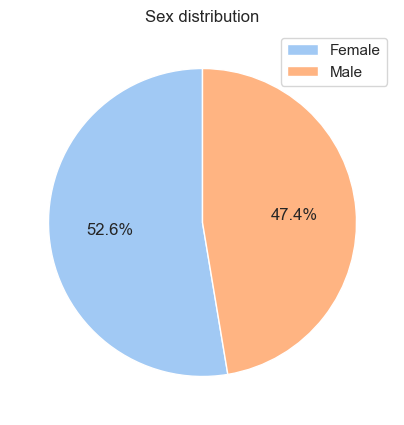

In [37]:
plt.figure(figsize=(5, 5))
plt.pie(merged_df['SEX'].value_counts(), autopct='%1.1f%%', startangle=90)
plt.title('Sex distribution')
plt.legend(merged_df['SEX'].value_counts().index)


In [38]:
merged_df['CLAIMS'].value_counts()/ len(merged_df)*100

True    99.99
False    0.01
Name: CLAIMS, dtype: float64

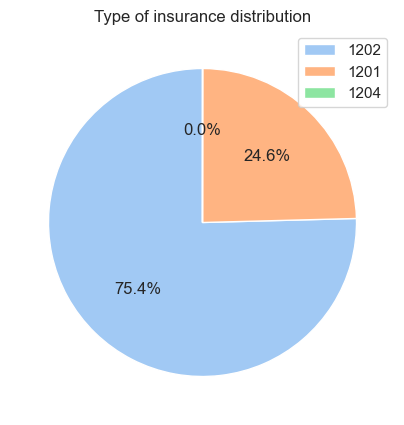

In [39]:
plt.figure(figsize=(5, 5))
plt.pie(merged_df['INSR_TYPE'].value_counts(), autopct='%1.1f%%', startangle=90)
plt.title('Type of insurance distribution')
plt.legend(merged_df['INSR_TYPE'].value_counts().index)


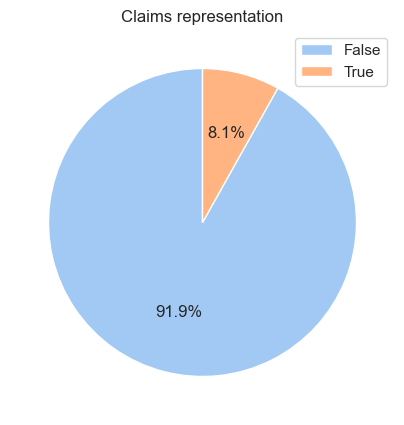

In [48]:
plt.figure(figsize=(5, 5))
plt.pie(merged_df['CLAIMS'].value_counts(), autopct='%1.1f%%', startangle=90)
plt.title('Claims representation')
plt.legend(merged_df['CLAIMS'].value_counts().index)

Text(0.5, 1.0, 'Years of Seniority')

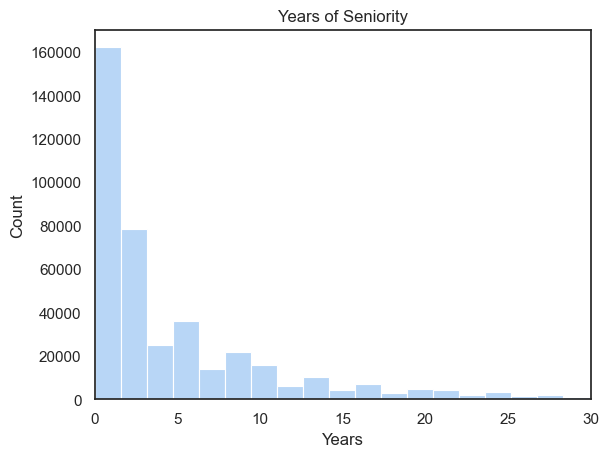

In [50]:
sns.histplot(merged_df['CUSTOMER_SENIORITY'], kde=False, bins=40)
plt.xlim(0, 30)
plt.xlabel("Years")
plt.ylabel("Count")
plt.title("Years of Seniority")

<Axes: >

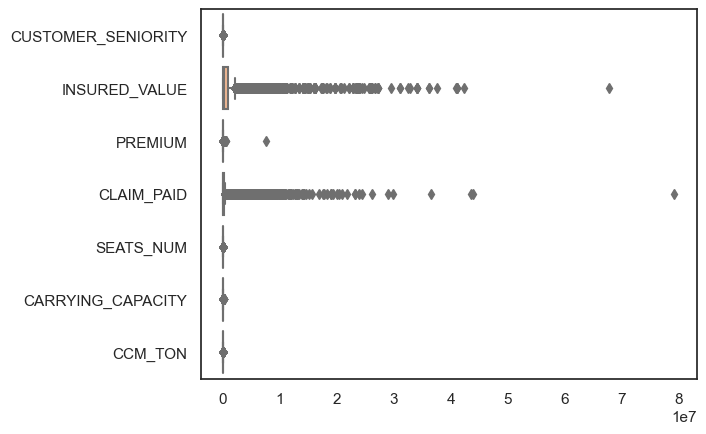

In [62]:
sns.boxplot(data= num_only,orient='h')

In [100]:
print("Skewness")
print("CUSTOMER_SENIORITY: " + "{:.2f}".format(pd.Series(num_only['CUSTOMER_SENIORITY']).skew()))
print("INSURED_VALUE: " + "{:.2f}".format(pd.Series(num_only['INSURED_VALUE']).skew()))
print("PREMIUM: " + "{:.2f}".format(pd.Series(num_only['PREMIUM']).skew()))
print("CLAIM_PAID: " + "{:.2f}".format(pd.Series(num_only['CLAIM_PAID']).skew()))
print("SEATS_NUM: " + "{:.2f}".format(pd.Series(num_only['SEATS_NUM']).skew()))
print("CARRYING_CAPACITY: " + "{:.2f}".format(pd.Series(num_only['CARRYING_CAPACITY']).skew()))
print("CCM_TON: " + "{:.2f}".format(pd.Series(num_only['CCM_TON']).skew()))

Skewness
CUSTOMER_SENIORITY: 2.12
INSURED_VALUE: 7.96
PREMIUM: 246.35
CLAIM_PAID: 23.61
SEATS_NUM: 6.51
CARRYING_CAPACITY: 13.26
CCM_TON: 1.52


El skewness positivo y de valores muy altos como en la prima o los siniestros pagados pueden indicar outliers, particularmente la prima que está tan alejada de los valores promedios, y podria ser un error en la data. El resto si bien indica una asimetria en la distribución, podrian ser datos reales y son preferibles dejarlos para entrenar el modelo. 
Lo mismo se podia visualizar en los boxplots arriba. 

In [104]:
print("Kurtosis")
print("CUSTOMER_SENIORITY: " + "{:.2f}".format(pd.Series(num_only['CUSTOMER_SENIORITY']).kurt()))
print("INSURED_VALUE: " + "{:.2f}".format(pd.Series(num_only['INSURED_VALUE']).kurt()))
print("PREMIUM: " + "{:.2f}".format(pd.Series(num_only['PREMIUM']).kurt()))
print("CLAIM_PAID: " + "{:.2f}".format(pd.Series(num_only['CLAIM_PAID']).kurt()))
print("SEATS_NUM: " + "{:.2f}".format(pd.Series(num_only['SEATS_NUM']).kurt()))
print("CARRYING_CAPACITY: " + "{:.2f}".format(pd.Series(num_only['CARRYING_CAPACITY']).kurt()))
print("CCM_TON: " + "{:.2f}".format(pd.Series(num_only['CCM_TON']).kurt()))

Kurtosis
CUSTOMER_SENIORITY: 5.31
INSURED_VALUE: 230.79
PREMIUM: 113695.44
CLAIM_PAID: 1099.88
SEATS_NUM: 51.51
CARRYING_CAPACITY: 346.35
CCM_TON: 1.76


## Análisis multivariado

<Axes: >

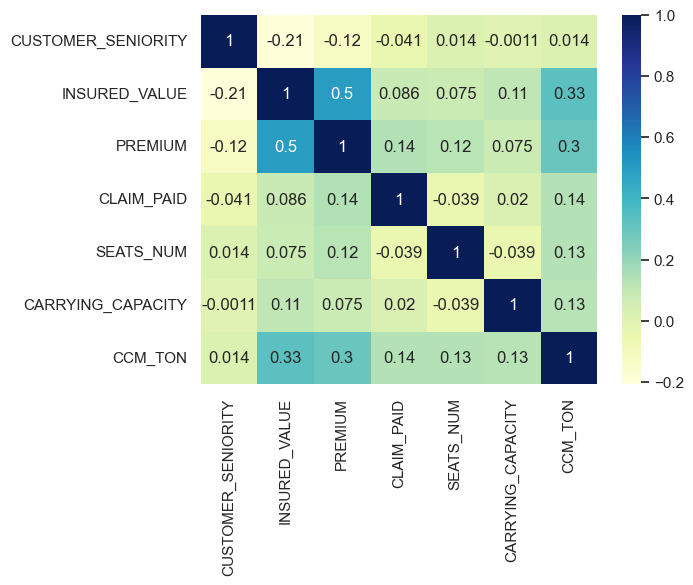

In [58]:
#Correlacion entre las variables numericas utilizando metodo de pearson ya que es el mas sugerido
sns.heatmap(num_only.corr(method='pearson'),
          annot=True, cmap='YlGnBu')

Text(0.5, 0, 'Claims')

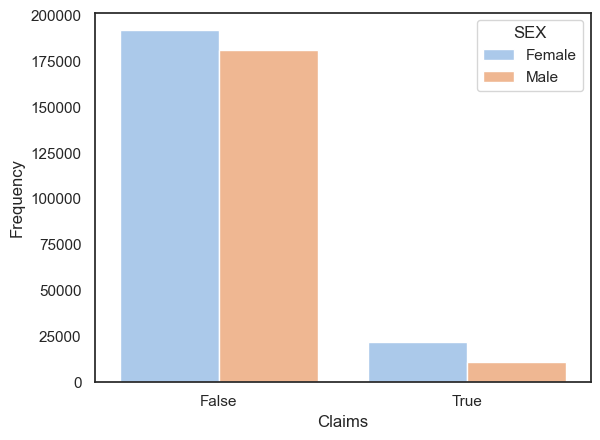

In [550]:
#Grafico de barras para indicar siniestros por tipo de sexo. Las mujeres tienen mayor proporcion (66%)
sns.countplot(x='CLAIMS',hue='SEX',data=merged_df)
plt.ylabel("Frequency")
plt.xlabel("Claims")

In [482]:
merged_df[merged_df['CLAIMS']== 1]['SEX'].value_counts()/ len(merged_df[merged_df['CLAIMS']== 1])*100


Female   66.10
Male     33.90
Name: SEX, dtype: float64

In [96]:
merged_df['USAGE'].value_counts()/ len(merged_df)*100

Own Goods                28.22
Private                  24.34
Fare Paying Passengers   15.79
General Cartage          14.93
Own service               6.64
Taxi                      5.00
Others                    1.26
Agricultural Own Farm     1.16
Special Construction      1.06
Agricultural Any Farm     0.51
Ambulance                 0.43
Learnes                   0.36
Car Hires                 0.29
Fire fighting             0.01
Name: USAGE, dtype: float64

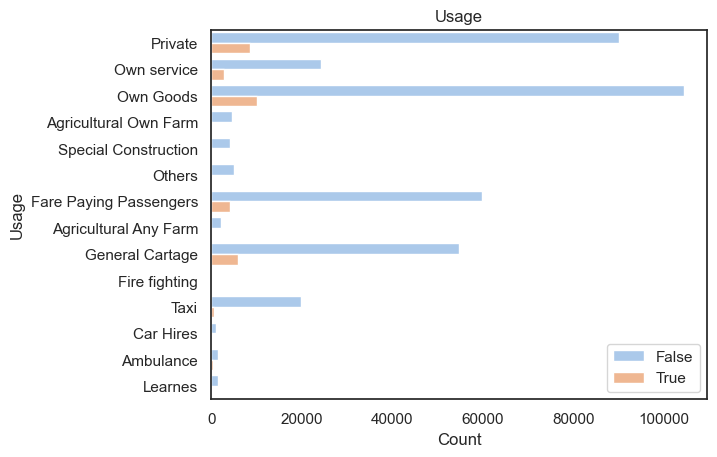

In [484]:
#Aquellos vehiculos con uso Privado y Own goods tienen la mayor cantidad de siniestros de la base
sns.countplot(data=merged_df, y="USAGE", orient='h', hue="CLAIMS")
plt.xlabel("Count")
plt.ylabel("Usage")
plt.title("Usage")
plt.legend(loc="lower right")


In [485]:
merged_df['TYPE_VEHICLE'].value_counts()/ len(merged_df)*100

Motor-cycle                 19.24
Truck                       18.55
Pick-up                     18.45
Automobile                  14.14
Bus                         12.91
Station Wagones              7.51
Trailers and semitrailers    4.39
Special construction         1.77
Tractor                      1.62
Tanker                       1.43
Trade plates                 0.00
Name: TYPE_VEHICLE, dtype: float64

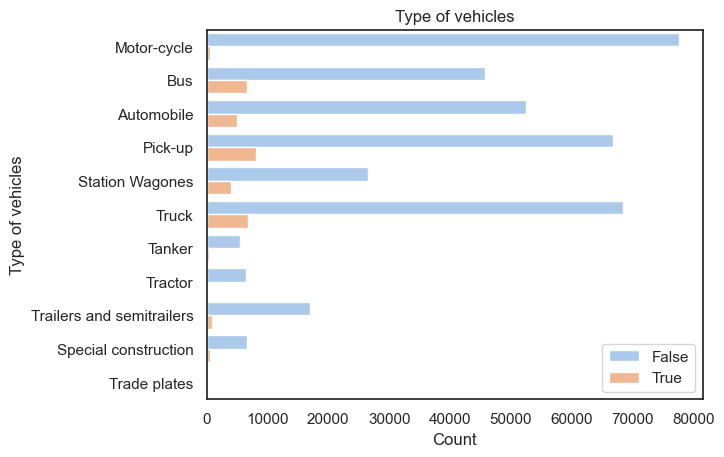

In [486]:
#20% de la base está compuesta por polizas de motos, seguido de cerca por Truck y Pick Up en un 18%. Bus, Pick up y Truck son aquellos que tienen
#mayor cantidad de siniestros 
sns.countplot(data=merged_df, y="TYPE_VEHICLE", orient='h', hue="CLAIMS")
plt.xlabel("Count")
plt.ylabel("Type of vehicles")
plt.title("Type of vehicles")
plt.legend(loc="lower right")

In [106]:
merged_df['MAKE'].value_counts()/ len(merged_df)*100

TOYOTA           33.23
BAJAJI           10.16
ISUZU             9.29
NISSAN            4.51
IVECO             2.59
                  ... 
JERMEN            0.00
DIATSU            0.00
UD                0.00
APACHERTE         0.00
NISSAN X-TRIAL    0.00
Name: MAKE, Length: 685, dtype: float64

In [108]:
make_top10= merged_df['MAKE'].value_counts().head(10)
make_subset= merged_df[merged_df['MAKE'].isin(make_top10.index)]


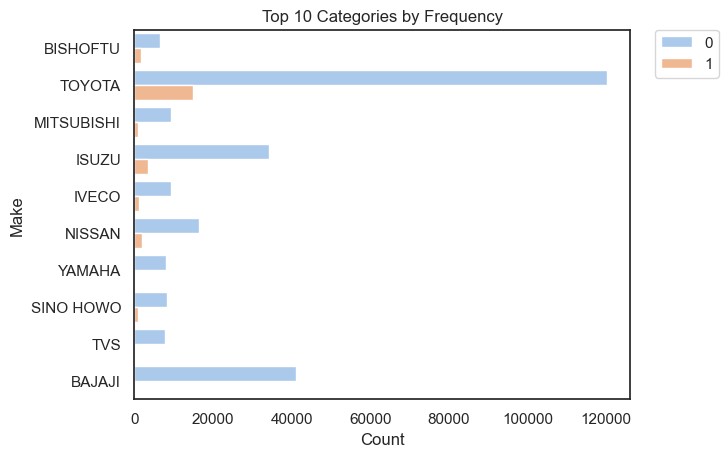

In [427]:
#30% de la base son vehiculos del fabricante Toyota, los top 10 en cantidad de polizas parecen ser fabricantes asiáticos. Por lo que se asume
#una base de datos asiatica. 
sns.countplot(data=make_subset, y='MAKE', hue='CLAIMS', orient='h')
plt.title('Top 10 Categories by Frequency')
plt.xlabel("Count")
plt.ylabel("Make")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<Axes: xlabel='PREMIUM', ylabel='USAGE'>

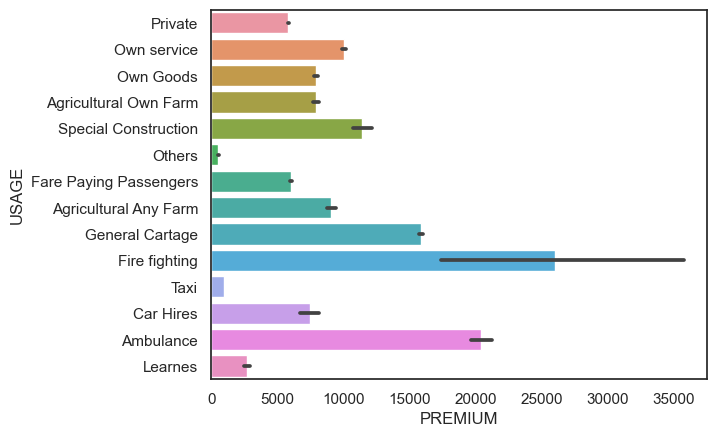

In [472]:
#Vehiculo de la categoría Fire Fighting parecen tener la prima mas alta, y con algun outlier
sns.barplot(data=merged_df, y='USAGE', x='PREMIUM', orient='h')


<Axes: xlabel='CLAIM_PAID', ylabel='USAGE'>

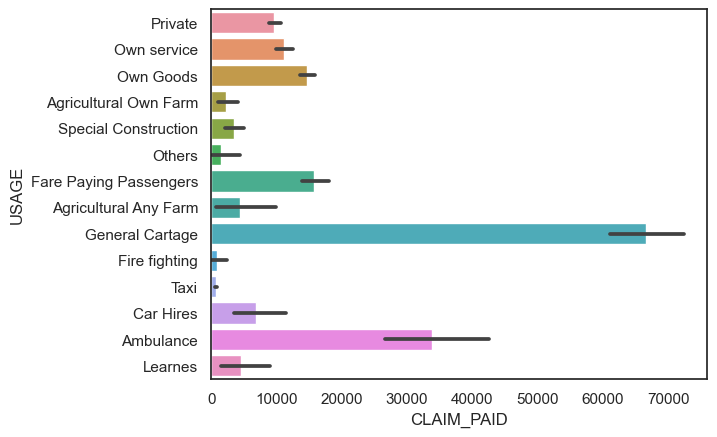

In [471]:
#Los vehiculos con uso "General Cartage" parecen tener los montos de siniestros más altos
sns.barplot(data=merged_df, y='USAGE', x='CLAIM_PAID', orient='h')


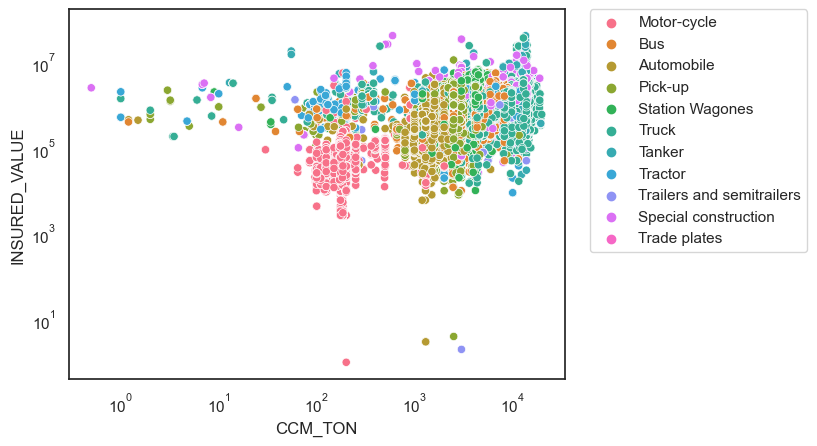

In [428]:
#Mas alla de algunas excepciones la mayoria de los vehiculos asegurados parecen tener un minimo de valor asegurado, independientemente de la potencia 
#del motor
sns.scatterplot(
    data=merged_df,
    x="CCM_TON", y="INSURED_VALUE", hue="TYPE_VEHICLE")

plt.xscale('log')
plt.yscale('log')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


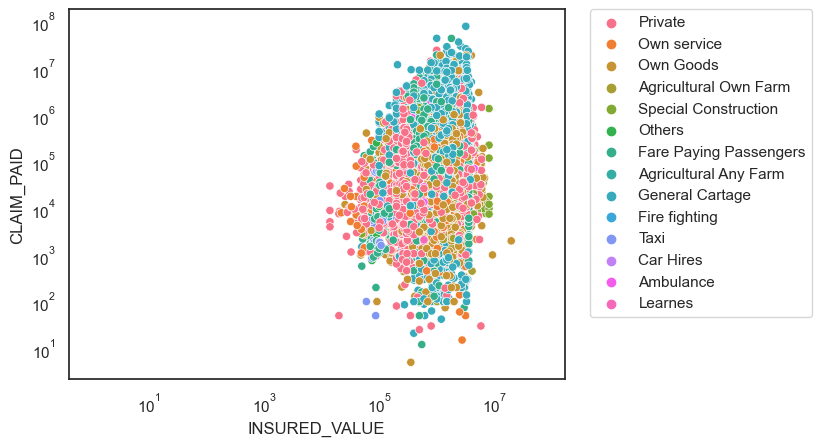

In [466]:
#Si bien no es tan claro de ver en el scatter plot, pero como tambien es indicado en la matriz de correlacion a mayor insured value, mayor claim paid. 
sns.scatterplot(
    data=merged_df,
    x="INSURED_VALUE", y="CLAIM_PAID", hue="USAGE")

plt.xscale('log')
plt.yscale('log')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


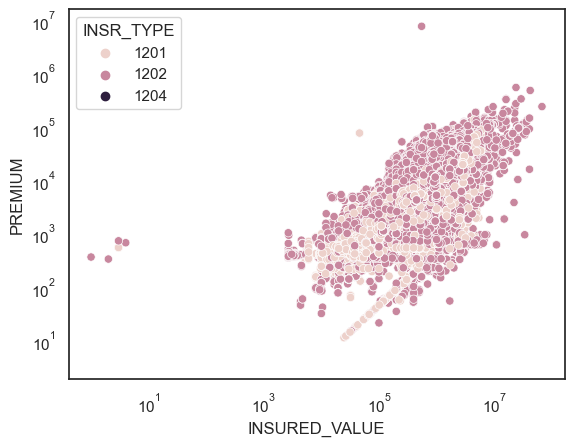

In [464]:
#Otra relacion tambien indicada en la matriz de correlacion, a mayor insured value, mayor prima, y las mayores vienen de los tipos de seguro 1202 (si
#bien el 75% de la base es 1202. 
sns.scatterplot(
    data=merged_df,
    x="INSURED_VALUE", y="PREMIUM", hue="INSR_TYPE")

plt.xscale('log')
plt.yscale('log')

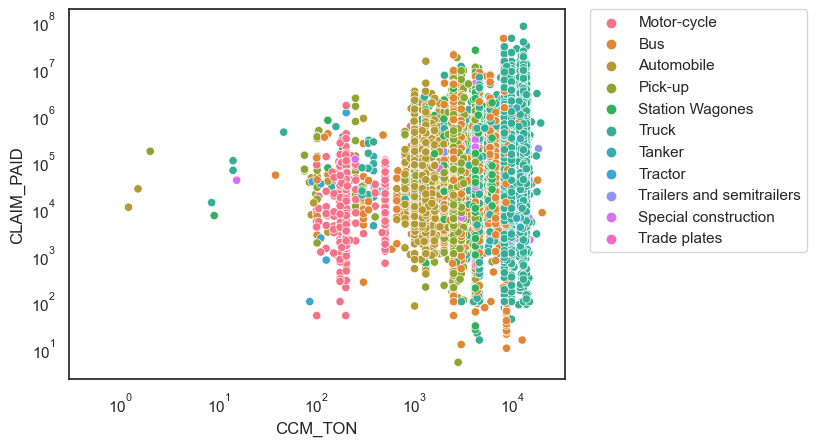

In [425]:
#En el ultimo scatterplot se puede ver que a mayor potencia de motor, mayor es el moton del pago de siniestro. Y los trucks son los que mayor
#potencia tienen
sns.scatterplot(
    data=merged_df,
    x="CCM_TON", y="CLAIM_PAID", hue="TYPE_VEHICLE")

plt.xscale('log')
plt.yscale('log')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## Outliers

In [117]:
#En base a los resultados arrojados de skewness y kurtosis procedemos a buscar aquellas observaciones con valores extremadamente altos para Premium y
#Claim Paid
#Premium arroja un solo resultado por encima de 1M (7.5M), cuando el q3 es de 10849.75. Por lo que podemos asumir que es un error en la base de datos, 
#y lo vamos a remover. 
merged_df.loc[merged_df['PREMIUM'] >= 	1000000]

,POLICY_ID,INSR_BEGIN,INSR_END,CUSTOMER_SENIORITY,SEX,INSR_TYPE,INSURED_VALUE,PREMIUM,VEHICLE_ID,USAGE,CLAIM_PAID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,CLAIMS


In [127]:
#Remuevo outlier
outlier=(merged_df['PREMIUM']==7581230.43)
merged_df_wo_outliers=merged_df[~outlier]

In [122]:
merged_df.loc[merged_df['CLAIM_PAID'] >= 	79247141.10]

,POLICY_ID,INSR_BEGIN,INSR_END,CUSTOMER_SENIORITY,SEX,INSR_TYPE,INSURED_VALUE,PREMIUM,VEHICLE_ID,USAGE,CLAIM_PAID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,CLAIMS


In [126]:
#Remuevo outlier
outlier=(merged_df['CLAIM_PAID']==79247141.10)
merged_df_wo_outliers==merged_df[~outlier]
merged_df_wo_outliers

,POLICY_ID,INSR_BEGIN,INSR_END,CUSTOMER_SENIORITY,SEX,INSR_TYPE,INSURED_VALUE,PREMIUM,VEHICLE_ID,USAGE,CLAIM_PAID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,CLAIMS
0,300226657,2014-07-01,2015-06-30,16,Female,1201,17000.00,163.20,5000546971,Private,NaN,1980,1.00,NaN,Motor-cycle,183.00,SUZUKI,False
1,300226656,2015-07-01,2016-06-30,29,Female,1201,17000.00,223.20,5000546971,Private,NaN,1980,1.00,NaN,Motor-cycle,183.00,SUZUKI,False
2,300231460,2014-07-01,2015-06-30,1,Female,1202,2600000.00,45761.90,5000578640,Own service,30981.20,2013,61.00,0.00,Bus,9700.00,BISHOFTU,True
3,300231459,2015-07-01,2016-06-30,0,Female,1202,2600000.00,45761.90,5000578640,Own service,127708.36,2013,61.00,0.00,Bus,9700.00,BISHOFTU,True
4,300231458,2016-07-01,2017-06-30,3,Female,1202,2600000.00,65515.00,5000578640,Own service,NaN,2013,61.00,0.00,Bus,9700.00,BISHOFTU,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406128,300504321,2017-08-07,2018-08-06,5,Female,1201,1700000.00,4283.43,5001255424,Private,NaN,2012,8.00,NaN,Station Wagones,4164.00,TOYOTA,False
406129,300478457,2017-08-07,2018-08-06,14,Male,1201,0.00,608.40,5001107578,Private,NaN,2002,4.00,NaN,Automobile,1796.00,TOYOTA,False
406130,300506367,2017-08-07,2018-08-06,2,Female,1201,1500000.00,2143.32,5001272585,Private,NaN,2014,7.00,NaN,Station Wagones,4461.00,TOYOTA,False
406131,300505170,2017-08-07,2018-08-06,1,Female,1202,2691421.15,6166.49,5001249176,Own Goods,NaN,2018,6.00,9.00,Pick-up,4164.00,TOYOTA,False


In [128]:
merged_df_wo_outliers.to_csv('train.csv', index=False)